In [1]:
!nvidia-smi


Sat Apr 13 13:27:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 15.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [4]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [5]:
def download_file(url, save_name) :
  url = url
  if not os.path.exists(save_name):
    file = requests.get (url)
    open (save_name, 'wb').write(file.content)

In [6]:
def unzip(zip_file=None) :
  try:
    with zipfile. ZipFile(zip_file) as z:
      z.extractall("./")
      print( "Extracted all")
  except:
    print("Invalid file")

In [7]:
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

unzip(zip_file='trash_inst_material.zip')

Extracted all


In [8]:
cwd = os.getcwd ()
print (cwd)

/content


In [9]:
import yaml

attr = {
    'path' : cwd+'/trash_inst_material',
    'train' : 'train/images',
    'val' : 'val/images',

    'names' : {
        0 : 'rov',
        1 : 'plant',
        2 : 'animal_fish',
        3 : 'animal_starfish',
        4 : 'animal_shells',
        5 : 'animal_crab',
        6 : 'animal_eel',
        7 : 'animal_etc',
        8 : 'trash_etc',
        9 : 'trash_frabic',
        10 : 'trash_fishing_gear',
        11 : 'trash_metal',
        12 : 'trash_paper',
        13 : 'trash_plastic',
        14 : 'trash_rubber',
        15 : 'trash_wood',
    }

}

In [10]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)


In [11]:
EPOCHS = 5
BATCH = 16
IM_SIZE = 640

In [12]:
!yolo \
      task = segment \
      mode = train \
      model = yolov8n-seg.pt \
      imgsz = {IM_SIZE} \
      data = trashcan_inst_material.yaml \
      epochs = {EPOCHS} \
      batch = {BATCH} \
      name = yolov8n-seg \
      exist_ok = True \
      amp = False

100% 6.73M/6.73M [00:00<00:00, 282MB/s]
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=trashcan_inst_material.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [ ]:
# Download the inference data.
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)

unzip(zip_file='trash_segment_inference_data.zip')

Extracted all


In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [ ]:
!yolo predict \
model='runs/segment/yolov8n-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8n_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3261184 parameters, 0 gradients, 12.0 GFLOPs

image 1/1204 /content/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 1 trash_etc, 125.3ms
image 2/1204 /content/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 1 trash_etc, 1 trash_plastic, 10.5ms
image 3/1204 /content/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 1 trash_etc, 1 trash_plastic, 9.1ms
image 4/1204 /content/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 1 trash_etc, 1 trash_plastic, 8.4ms
image 5/1204 /content/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 1 trash_plastic, 8.1ms
image 6/1204 /content/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 1 trash_plastic, 8.1ms
image 7/1204 /content/trash_inst_material/val/images/vid_000002_frame0000019.jpg: 384x640 1 trash_plastic, 8.4

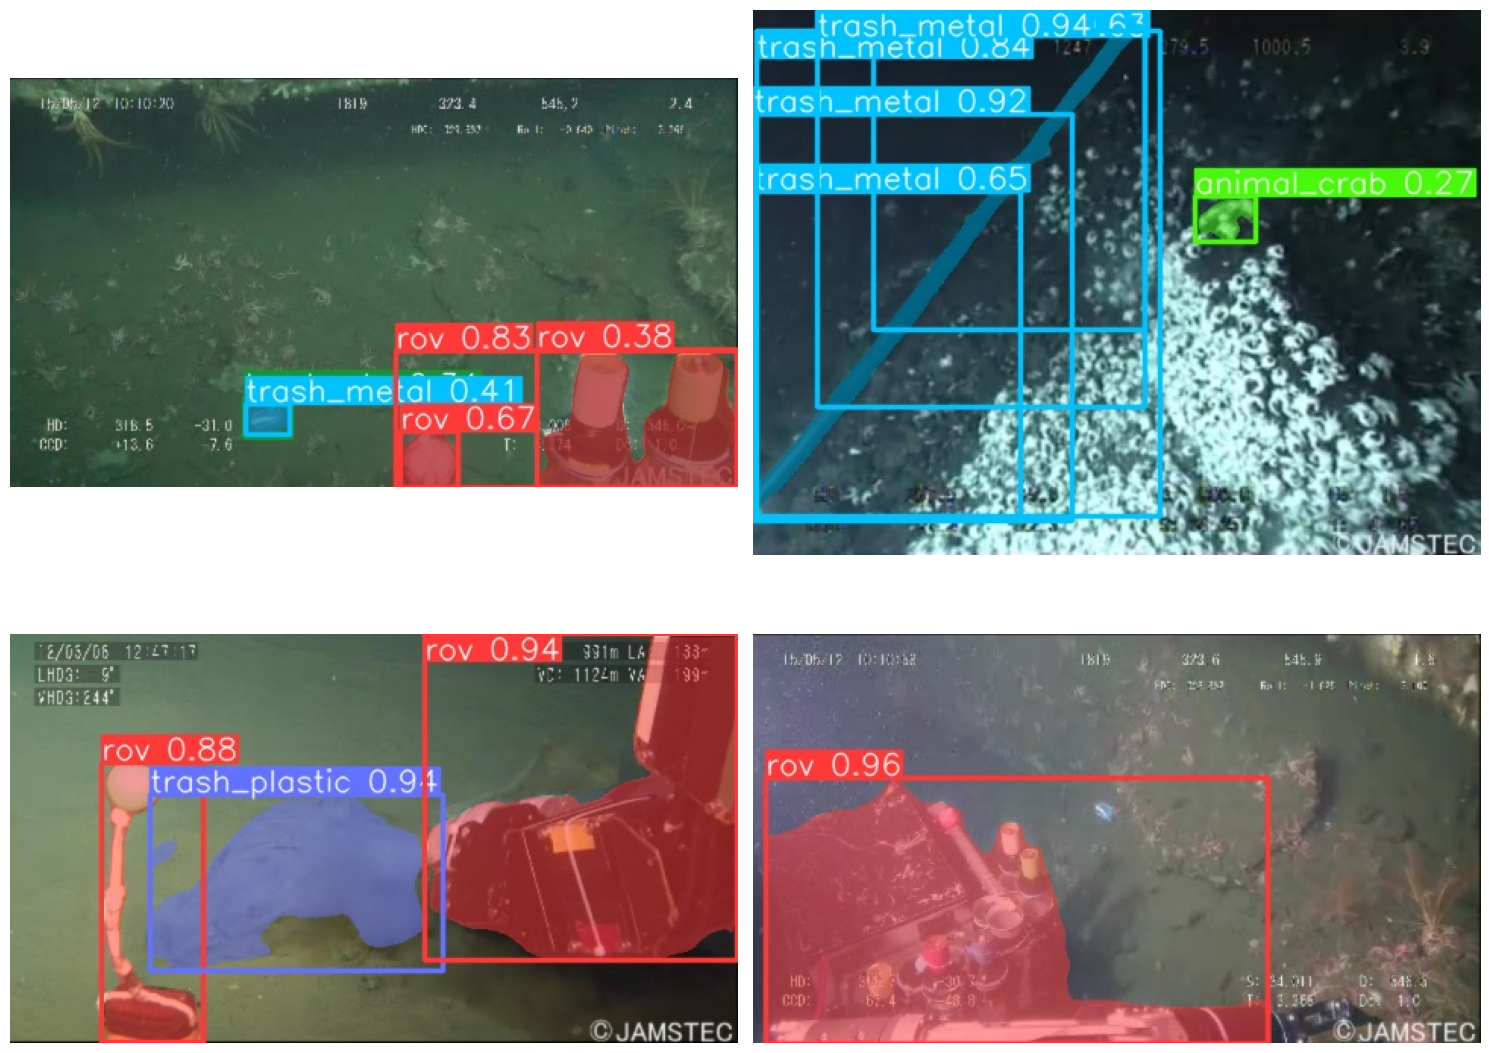

In [ ]:
visualize('runs/segment/yolov8n_predict')


In [ ]:
!yolo predict \
model='runs/segment/yolov8n-seg/weights/best.pt' \
source='trash_segment_inference_data/manythings.mp4' \
name='yolov8n_predict_videos1' \
exist_ok=True \
save=True

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3261184 parameters, 0 gradients, 12.0 GFLOPs

video 1/1 (frame 1/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_plastic, 116.6ms
video 1/1 (frame 2/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 1 trash_plastic, 8.6ms
video 1/1 (frame 3/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 (no detections), 8.3ms
video 1/1 (frame 4/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 8.1ms
video 1/1 (frame 5/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 (no detections), 8.4ms
video 1/1 (frame 6/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 8.2ms
video 1/1 (frame 7/1168) /content/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_paper, 1 trash_plastic, 8.1ms
video 1/1 (frame 8/1168) /content/